In [94]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np

data = pd.read_csv('../ch09/공공보건의료기관현황.csv', index_col=0, encoding='cp949', engine='python')

data.head()

,의료기관명,요양종별,관계 행정기관,근거 법령,설립형태,응급지정,허가병상수,주소,홈페이지,대표전화,FAX
연번,,,,,,,,,,,
1,서울대학교병원,상급종합병원,교육부,서울대학교병원 설치법,공립(기타),권역응급의료센터,1803,서울특별시 종로구 대학로 101 (연건동),www.snuh.org,1588-5700,1588-5700
2,서울적십자병원,종합병원,대한적십자사,대한적십자사 조직법,공립(기타),지역응급의료기관,292,"서울특별시 종로구 새문안로 9, 적십자병원 (평동)",www.rch.or.kr/seoul,02-2002-8000,02-2002-8000
3,서울특별시 동부병원,종합병원,서울특별시,서울특별시 시립병원 설치 및 운영에 관한조례,공립(시군구립),지역응급의료기관,201,서울특별시 동대문구 무학로 124 (용두동),www.dbhosp.go.kr,02-920-9114,02-920-9114
4,경찰병원,종합병원,경찰청,경찰청과 그 소속기관 직제,국립,지역응급의료기관,380,"서울특별시 송파구 송이로 123, 국립경찰병원 (가락동)",www.nph.go.kr,02-3400-1114,02-3400-1114
5,한국보훈복지의료공단 중앙보훈병원,종합병원,국가보훈처,한국보훈복지의료공단법,공립(기타),지역응급의료센터,985,서울특별시 강동구 진황도로61길 53 (둔촌동),http://seoul.bohun.or.kr,02-2225-1114,02-2225-1114


In [95]:
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns=['시도', '군구'])
addr.head()

,시도,군구
0,서울특별시,종로구
1,서울특별시,종로구
2,서울특별시,동대문구
3,서울특별시,송파구
4,서울특별시,강동구


In [96]:
addr['시도'].unique()

array(['서울특별시', '부산광역시', '인천광역시', '경기도', '강원특별자치도', '충청북도', '대전광역시',
       '충청남도', '세종특별자치시', '전라북도', '광주광역시', '전라남도', '대구광역시', '경상북도',
       '경상남도', '울산광역시', '제주특별자치도'], dtype=object)

In [97]:
addr['군구'].unique()

array(['종로구', '동대문구', '송파구', '강동구', '동작구', '노원구', '중구', '중랑구', '양천구',
       '은평구', '서초구', '강북구', '강남구', '마포구', '광진구', '성동구', '관악구', '영등포구',
       '서구', '연제구', '사상구', '기장군', '북구', '해운대구', '사하구', '부산진구', '동구',
       '의정부시', '포천시', '파주시', '안성시', '고양시', '성남시', '수원시', '안산시', '이천시',
       '부평구', '연수구', '양주시', '용인시', '옹진군', '남양주시', '양평군', '구리시', '미추홀구',
       '동두천시', '여주시', '계양구', '시흥시', '화성시', '평택시', '부천시', '삼척시', '영월군',
       '원주시', '속초시', '강릉시', '춘천시', '태백시', '동해시', '홍천군', '정선군', '청주시',
       '충주시', '단양군', '제천시', '영동군', '홍성군', '공주시', '천안시', '서산시', '대덕구',
       '보듬7로', '유성구', '논산시', '서천군', '보령시', '전주시', '남원시', '군산시', '진안군',
       '정읍시', '완주군', '부안군', '고창군', '광산구', '목포시', '화순군', '순천시', '남구',
       '나주시', '강진군', '고흥군', '함평군', '장흥군', '영광군', '무안군', '진도군', '보성군',
       '여수시', '곡성군', '광양시', '장성군', '신안군', '포항시', '달서구', '안동시', '김천시',
       '상주시', '영주시', '경산시', '울진군', '수성구', '고령군', '청도군', '봉화군', '구미시',
       '경주시', '칠곡군', '의성군', '문경시', '달성군', '창원시', '진주시', '양산시', '통영시',
       '거창군', '김

In [98]:
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,서울특별시,종로구,서울특별시 종로구
1,서울특별시,종로구,서울특별시 종로구
2,서울특별시,동대문구,서울특별시 동대문구
3,서울특별시,송파구,서울특별시 송파구
4,서울특별시,강동구,서울특별시 강동구


In [99]:
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,서울특별시,종로구,서울특별시 종로구,0
1,서울특별시,종로구,서울특별시 종로구,0
2,서울특별시,동대문구,서울특별시 동대문구,0
3,서울특별시,송파구,서울특별시 송파구,0
4,서울특별시,강동구,서울특별시 강동구,0


In [100]:
addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'], as_index=False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,4
1,강원특별자치도,동해시,강원특별자치도 동해시,1
2,강원특별자치도,삼척시,강원특별자치도 삼척시,1
3,강원특별자치도,속초시,강원특별자치도 속초시,1
4,강원특별자치도,영월군,강원특별자치도 영월군,1


In [101]:
addr_group = addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 영월군,강원특별자치도,영월군,1


In [102]:
# pip install openpyxl

In [103]:
population = pd.read_excel('../data/행정구역_시군구_별__성별_인구수_20241223122518.xlsx')
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51226757,25504176,25722581
1,서울특별시,소계,9335495,4507664,4827831
2,서울특별시,종로구,138577,66673,71904
3,서울특별시,중구,120931,58247,62684
4,서울특별시,용산구,204079,97628,106451


In [104]:
population = population.rename(columns={'행정구역(시군구)별(1)':'시도', '행정구역(시군구)별(2)':'군구'})
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51226757,25504176,25722581
1,서울특별시,소계,9335495,4507664,4827831
2,서울특별시,종로구,138577,66673,71904
3,서울특별시,중구,120931,58247,62684
4,서울특별시,용산구,204079,97628,106451


In [105]:
for element in range(0,len(population)):
    population['군구'][element] = population['군구'][element].strip()

C:\Users\COM\AppData\Local\Temp\ipykernel_12848\1909878512.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  population['군구'][element] = population['군구'][element].strip()
C:\Users\COM\AppData\Local\Temp\ipykernel_12848\1909878512.py:2: Fut

In [106]:
population['시도군구'] = population.apply(lambda r: r['시도']+' '+r['군구'], axis=1)
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51226757,25504176,25722581,전국 소계
1,서울특별시,소계,9335495,4507664,4827831,서울특별시 소계
2,서울특별시,종로구,138577,66673,71904,서울특별시 종로구
3,서울특별시,중구,120931,58247,62684,서울특별시 중구
4,서울특별시,용산구,204079,97628,106451,서울특별시 용산구


In [107]:
population = population[population.군구 != '소계']
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,138577,66673,71904,서울특별시 종로구
3,서울특별시,중구,120931,58247,62684,서울특별시 중구
4,서울특별시,용산구,204079,97628,106451,서울특별시 용산구
5,서울특별시,성동구,274287,132769,141518,서울특별시 성동구
6,서울특별시,광진구,332571,159576,172995,서울특별시 광진구


In [108]:
population = population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,138577,66673,71904
서울특별시 중구,서울특별시,중구,120931,58247,62684
서울특별시 용산구,서울특별시,용산구,204079,97628,106451
서울특별시 성동구,서울특별시,성동구,274287,132769,141518
서울특별시 광진구,서울특별시,광진구,332571,159576,172995


In [109]:
addr_population_merge = pd.merge(addr_group, population,
                                 how='inner',
                                 left_index=True,
                                 right_index=True)
addr_population_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,207737,102911,104826
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,87716,44528,43188
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,61952,31542,30410
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,81025,39986,41039
강원특별자치도 영월군,강원특별자치도,영월군,1,강원특별자치도,영월군,36820,19037,17783


In [110]:
local_MC_Population = addr_population_merge[['시도_x', '군구_x', 'count', '총인구수 (명)']]
local_MC_Population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207737
강원특별자치도 동해시,강원특별자치도,동해시,1,87716
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61952
강원특별자치도 속초시,강원특별자치도,속초시,1,81025
강원특별자치도 영월군,강원특별자치도,영월군,1,36820


In [111]:
local_MC_Population = local_MC_Population.rename(columns={'시도_x':'시도', '군구_x':'군구', 'count':'count', '총인구수 (명)':'인구수'})
local_MC_Population.head()

,시도,군구,count,인구수
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207737
강원특별자치도 동해시,강원특별자치도,동해시,1,87716
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61952
강원특별자치도 속초시,강원특별자치도,속초시,1,81025
강원특별자치도 영월군,강원특별자치도,영월군,1,36820


In [112]:
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis=0)*100000
local_MC_Population.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207737,1.925512
강원특별자치도 동해시,강원특별자치도,동해시,1,87716,1.140043
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61952,1.614153
강원특별자치도 속초시,강원특별자치도,속초시,1,81025,1.234187
강원특별자치도 영월군,강원특별자치도,영월군,1,36820,2.715915


In [113]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

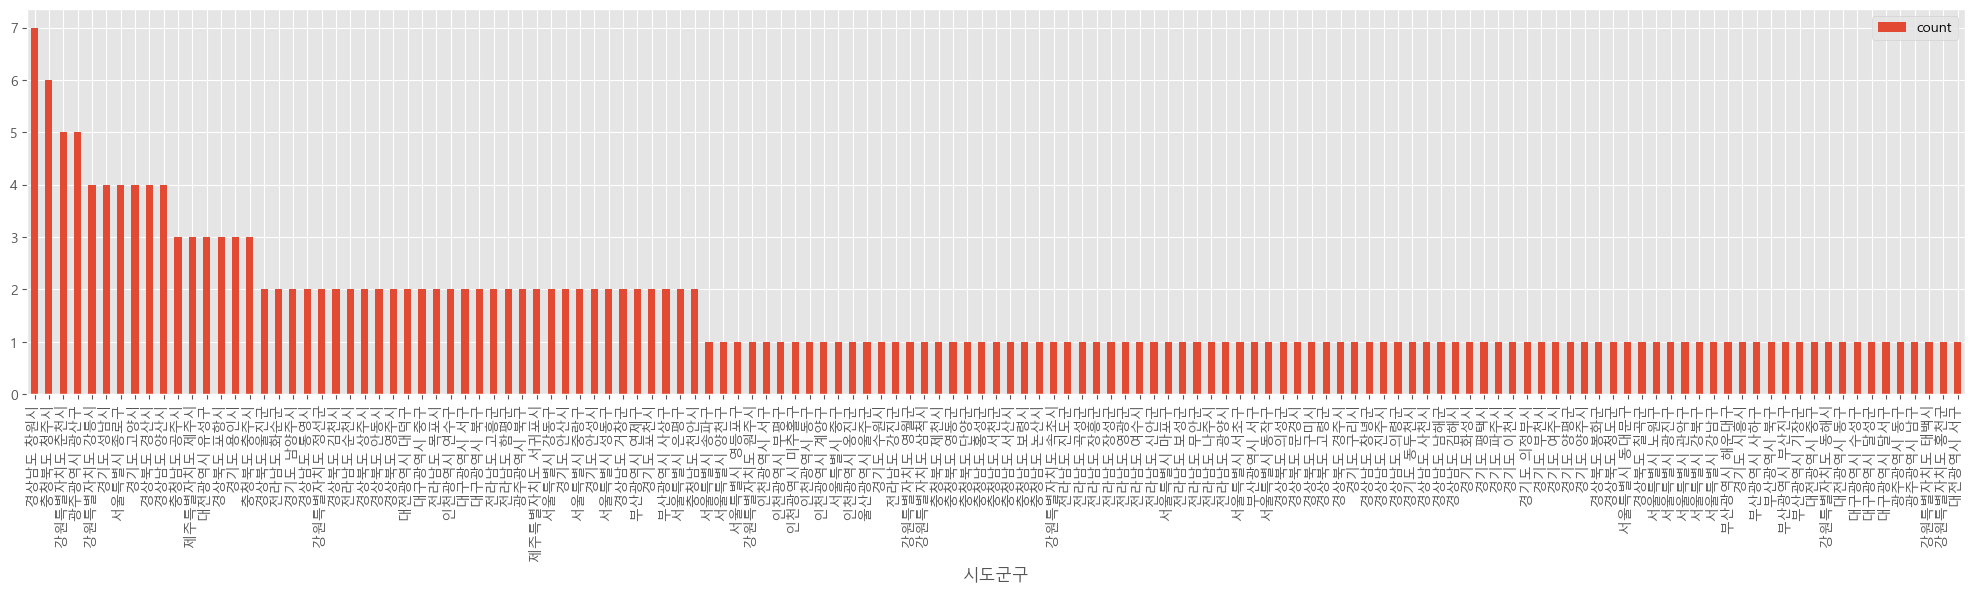

In [114]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values(by='count', ascending=False)
plt.rcParams['figure.figsize'] = [25,5]
MC_ratio.plot(kind='bar', rot=90)
plt.show()

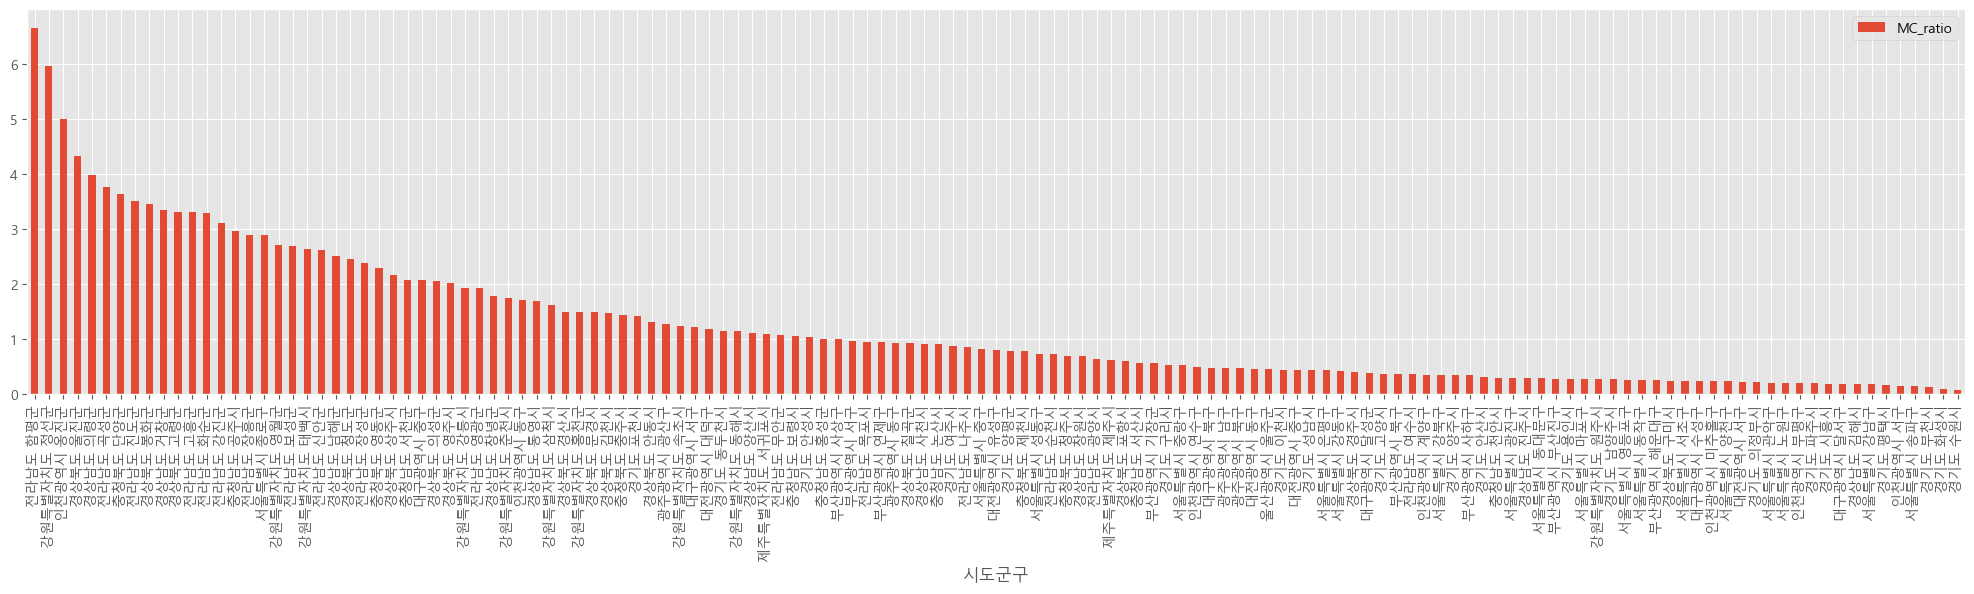

In [115]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values(by='MC_ratio', ascending=False)
plt.rcParams['figure.figsize'] = [25,5]
MC_ratio.plot(kind='bar', rot=90)
plt.show()

In [116]:
import os
path = os.getcwd()

In [117]:
data_draw_korea = pd.read_csv('./data_draw_korea.csv', index_col=0, encoding='UTF-8', engine='python')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [118]:
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도']+' '+r['행정구역'], axis=1)
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [119]:
data_draw_korea = data_draw_korea.set_index('시도군구')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [120]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea, local_MC_Population, how='outer', left_index=True, right_index=True)

data_draw_korea_MC_Population_all

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,NaN,NaN,NaN,NaN,NaN
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,NaN,NaN,NaN,NaN,NaN
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,NaN,NaN,NaN,NaN,NaN
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462.0,제천,8.0,10.0,882.47,충청북도,제천시,충청북도,제천시,1.0,128725.0,0.776850
충청북도 증평군,34480.0,증평,6.0,11.0,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809.0,진천,5.0,11.0,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [121]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)],  # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)],  # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9), (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)],  # 경기도
    [(9, 12), (9, 10), (8, 10)],  # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7), (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)],  # 충청북도
    [(14, 4), (15, 4), (15, 6)],  # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)],  # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10), (15, 11), (14, 11), (14, 12), (13, 12)],  # 대구시
    [(15, 11), (16, 11), (16, 13)],  # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)],  # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)],  # 광주시
    [(18, 5), (20, 5), (20, 6)],  # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)],  # 부산시
]

In [122]:
def draw_blockMap(blockedMap, targetData, title, color):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    # plt.gca().set_aspect(1)
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()

    plt.savefig('./blockMap.png')

    plt.show()



In [123]:
duplicates = data_draw_korea_MC_Population_all[data_draw_korea_MC_Population_all.duplicated(subset=['y', 'x'], keep=False)]
print(duplicates)


             인구수_x shortName   x   y  면적 광역시도 행정구역       시도    군구  count  \
시도군구                                                                       
강원특별자치도 강릉시    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   강릉시    4.0   
강원특별자치도 동해시    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   동해시    1.0   
강원특별자치도 삼척시    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   삼척시    1.0   
강원특별자치도 속초시    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   속초시    1.0   
강원특별자치도 영월군    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   영월군    1.0   
강원특별자치도 원주시    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   원주시    1.0   
강원특별자치도 정선군    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   정선군    2.0   
강원특별자치도 춘천시    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   춘천시    5.0   
강원특별자치도 태백시    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   태백시    1.0   
강원특별자치도 홍천군    NaN       NaN NaN NaN NaN  NaN  NaN  강원특별자치도   홍천군    1.0   
인천광역시 미추홀구     NaN       NaN NaN NaN NaN  NaN  NaN    인천광역시  미추홀구    1.0   

           

In [124]:
blockedMap = data_draw_korea_MC_Population_all.drop_duplicates(subset=['y', 'x'])


In [125]:
data_draw_korea_MC_Population_all = (
    data_draw_korea_MC_Population_all
    .groupby(['x', 'y'], as_index=False)
    .sum()  # 또는 .sum(), 중복된 값을 처리하는 방법을 결정
)


In [126]:
duplicates = data_draw_korea_MC_Population_all.duplicated(subset=['x', 'y'])
print(data_draw_korea_MC_Population_all[duplicates])


Empty DataFrame
Columns: [x, y, 인구수_x, shortName, 면적, 광역시도, 행정구역, 시도, 군구, count, 인구수_y, MC_ratio]
Index: []


C:\Users\COM\AppData\Local\Temp\ipykernel_12848\167158969.py:46: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


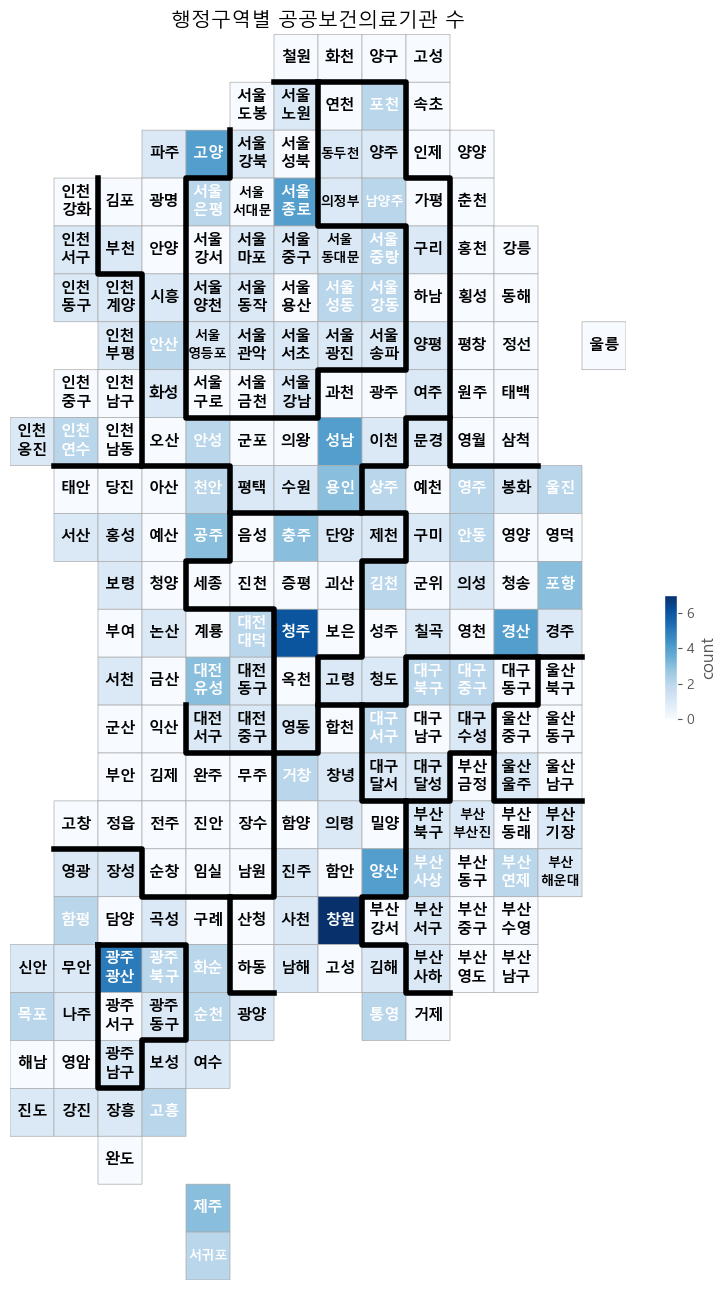

In [127]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

C:\Users\COM\AppData\Local\Temp\ipykernel_12848\167158969.py:46: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


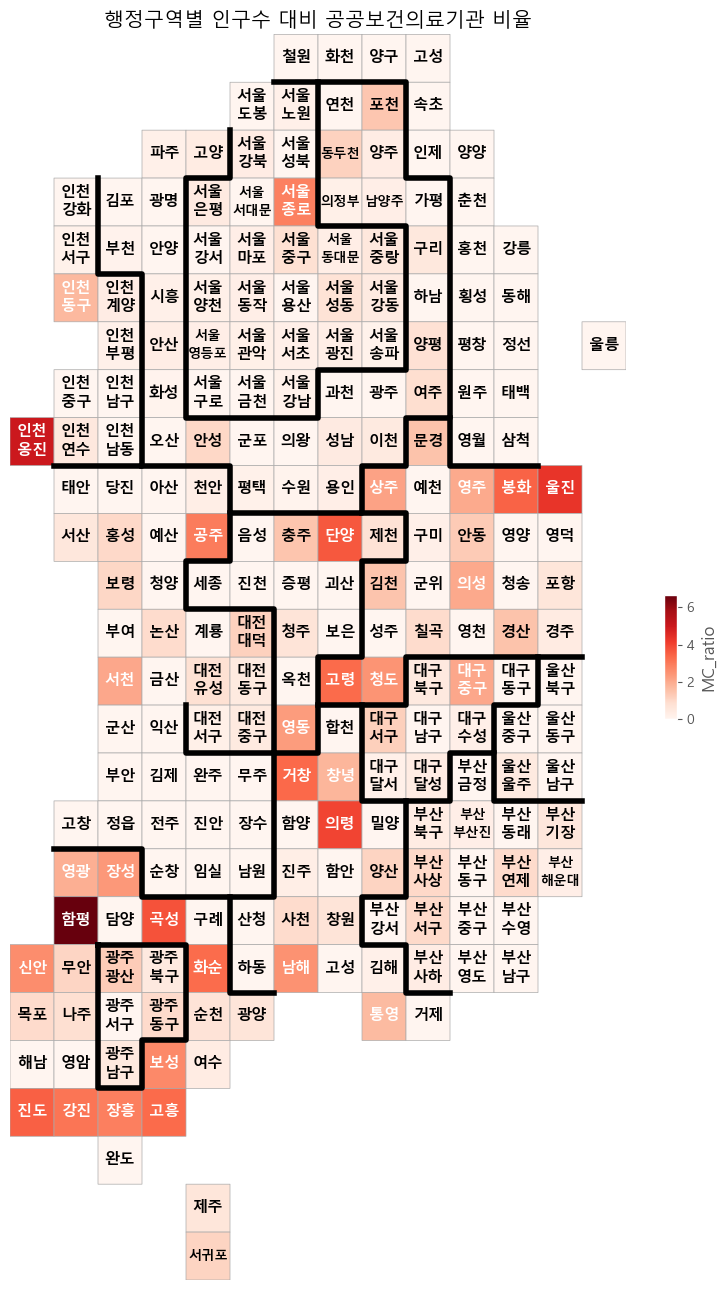

In [128]:
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds')